In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from utils import XyScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


In [79]:
df = pd.read_csv('/home/noahprowell/galvanize/case-studies/regression-case-study/predict_auction_price/data/Train.csv')

/home/noahprowell/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
def drop_column(df, column_name):
    df = df.drop(columns = column_name)
    return df
    

In [81]:
def formatting(df):
    '''Format Dataframe for Price Prediction Model
    
    
    '''
    df_usage = df[df.UsageBand.notnull()]
    drop_list = drop_list = ['ProductGroupDesc', 'Enclosure_Type', 'Coupler_System', 'SalesID', 'auctioneerID', 'Engine_Horsepower', 'MachineID', 'ModelID',
                'fiModelDesc', 'fiBaseModel','fiSecondaryDesc','fiModelSeries','fiModelDescriptor', 'fiProductClassDesc',
'Thumb_None or Unspecified',
 'Blade_Type_PAT',
 'Enclosure_EROPS',
 'Stick_Standard',
 'Turbocharged_None or Unspecified',
 'Undercarriage_Pad_Width_None or Unspecified',
 'Stick_Extended',
 'Differential_Type_Standard',
 'datasource_172',
 'ProductGroup_TTT',
 'Thumb_Manual',
 'Ride_Control_None or Unspecified',
 'Undercarriage_Pad_Width_32 inch',
 'datasource_121',
 'Hydraulics_Auxiliary',
 'Undercarriage_Pad_Width_28 inch',
 'MachineHoursCurrentMeter',
 'Thumb_Hydraulic',
 'Pushblock_None or Unspecified',
 "Blade_Width_13'",
 'state_North Carolina',
 'Differential_Type_Limited Slip',
 'Undercarriage_Pad_Width_24 inch',
 'Scarifier_None or Unspecified',
 'Travel_Controls_2 Pedal',
 'Blade_Width_None or Unspecified',
 'Tire_Size_10"',
 'Transmission_None or Unspecified',
 'Undercarriage_Pad_Width_30 inch',
 'Turbocharged_Yes',
 "Blade_Width_<12'",
 'state_Tennessee',
 'state_California',
 'state_Maryland',
 'state_New Mexico',
 'Ripper_Multi Shank',
 'Tire_Size_23.1"',
 'state_Hawaii',
 'Undercarriage_Pad_Width_20 inch',
 'Travel_Controls_Finger Tip',
 'state_New York',
 'state_Texas',
 'Hydraulics_Base + 6 Function',
 'state_Massachusetts',
 'Undercarriage_Pad_Width_33 inch',
 'Blade_Type_None or Unspecified',
 'Undercarriage_Pad_Width_22 inch',
 'state_Wyoming',
 'UsageBand_High',
 'state_Utah',
 'state_Arkansas',
 'Tip_Control_None or Unspecified',
 'state_Oklahoma',
 'Tire_Size_23.5"',
 'Stick_Length_9\' 10"',
 'state_Virginia',
 'Undercarriage_Pad_Width_25 inch',
 'Tire_Size_17.5',
 'Undercarriage_Pad_Width_14 inch',
 'Steering_Controls_Four Wheel Standard',
 'Undercarriage_Pad_Width_18 inch',
 'Undercarriage_Pad_Width_31 inch',
 'state_Rhode Island',
 'Stick_Length_9\' 5"',
 'state_New Jersey',
 'Travel_Controls_1 Speed',
 'state_Indiana',
 'Undercarriage_Pad_Width_16 inch',
 'state_Georgia',
 'Stick_Length_13\' 7"',
 'Undercarriage_Pad_Width_15 inch',
 'Stick_Length_8\' 2"',
 'state_Alaska',
 'Tire_Size_7.0"',
 'Hydraulics_None or Unspecified',
 'Undercarriage_Pad_Width_27 inch',
 'state_Idaho',
 'Drive_System_Two Wheel Drive',
 'state_Nebraska',
 'state_Delaware',
 'state_Pennsylvania',
 'Blade_Type_Landfill',
 'Stick_Length_8\' 4"',
 'Travel_Controls_Lever',
 'Travel_Controls_Pedal',
 'Differential_Type_Locking',
 'Transmission_Direct Drive',
 'Enclosure_None or Unspecified',
 'state_Louisiana',
 'UsageBand_Medium',
 'Stick_Length_14\' 1"',
 'datasource_132',
 'Blade_Type_Coal',
 'Undercarriage_Pad_Width_31.5 inch',
 'state_Kentucky',
 'Undercarriage_Pad_Width_26 inch',
 'Hydraulics_Flow_High Flow',
 'Hydraulics_Flow_None or Unspecified',
 'state_Washington DC',
 'state_Michigan',
 'Coupler_None or Unspecified',
 'Transmission_Hydrostatic',
 'Undercarriage_Pad_Width_36 inch',
 'Enclosure_EROPS AC',
 'state_Colorado',
 'Pattern_Changer_No',
 'Tire_Size_13"',
 'Hydraulics_Base + 5 Function',
 'state_Oregon',
 'Blade_Type_Angle',
 'Pad_Type_Grouser',
 'Stick_Length_11\' 10"',
 'Coupler_Manual',
 'Track_Type_Rubber',
 'Pad_Type_None or Unspecified',
 'Tire_Size_20.5',
 'state_Nevada',
 'Grouser_Type_Double',
 'Backhoe_Mounting_Yes',
 'Stick_Length_13\' 10"',
 'Blade_Type_VPAT',
 'Stick_Length_6\' 3"',
 'state_Wisconsin',
 'state_Kansas',
 'Hydraulics_Standard',
 'state_Connecticut',
 'state_New Hampshire',
 'Transmission_AutoShift',
 'Stick_Length_15\' 4"',
 'state_Missouri',
 'Drive_System_All Wheel Drive',
 'state_Vermont',
 'state_Washington',
 'Steering_Controls_Wheel',
 'Hydraulics_Flow_Standard',
 'Transmission_Autoshift',
 'state_Maine',
 'state_Iowa',
 'Differential_Type_No Spin',
 'Hydraulics_Base + 1 Function',
 'Enclosure_NO ROPS',
 'state_Mississippi',
 'Stick_Length_8\' 10"',
 'Stick_Length_9\' 8"',
 'state_Montana',
 'state_Arizona',
 'Stick_Length_12\' 4"',
 'Hydraulics_Base + 4 Function',
 'Drive_System_Four Wheel Drive',
 'Hydraulics_Base + 2 Function',
 'state_Puerto Rico',
 'Tire_Size_15.5',
 'state_Ohio',
 'state_Alabama',
 'Coupler_Hydraulic',
 'state_Illinois',
 'state_Minnesota',
 'state_South Dakota',
 'Stick_Length_8\' 6"',
 'Undercarriage_Pad_Width_34 inch',
 'state_West Virginia',
 'Pad_Type_Street',
 'state_North Dakota',
 'Stick_Length_15\' 9"',
 'Stick_Length_10\' 10"',
 'state_South Carolina',
 'Ripper_Yes',
 'Hydraulics_Base + 3 Function',
 'ProductSize_Small',
 'Tip_Control_Sideshift & Tip',
 'Ripper_Single Shank',
 'Blade_Type_No',
 'Tire_Size_15.5"',
 'Tip_Control_Tip',
 'Stick_Length_12\' 8"',
 'Stick_Length_10\' 2"',
 'Travel_Controls_None or Unspecified',
 'Tire_Size_None or Unspecified',
 "Blade_Width_16'",
 'Blade_Extension_Yes',
 'Stick_Length_11\' 0"',
 'UsageBand_Low',
 'Blade_Type_U',
 'Blade_Type_Straight',
 'datasource_136',
 'Transmission_Powershuttle',
 'Stick_Length_9\' 6"',
 'Pad_Type_Reversible',
 'Scarifier_Yes',
 'Stick_Length_9\' 7"',
 'Steering_Controls_Command Control',
 'Grouser_Tracks_Yes',
 'Tire_Size_17.5"',
 'state_Florida',
 'Blade_Extension_None or Unspecified',
 "Blade_Width_14'",
 'Tire_Size_14"',
 'Hydraulics_3 Valve',
 'Pushblock_Yes',
 'Ride_Control_Yes',
 'Tire_Size_23.5',
 'Transmission_Powershift',
 'Tire_Size_29.5',
 'datasource_149',
 'Grouser_Type_Triple',
 'Hydraulics_4 Valve',
 'Stick_Length_12\' 10"',
 'Stick_Length_None or Unspecified',
 'Tire_Size_20.5"',
 'Stick_Length_10\' 6"',
 'Drive_System_No',
 'Tire_Size_26.5',
 'Steering_Controls_Conventional',
 'Enclosure_EROPS w AC',
 'Forks_Yes',
 'Forks_None or Unspecified',
 'Pattern_Changer_None or Unspecified',
 'Grouser_Tracks_None or Unspecified',
 'ProductGroup_WL',
 'Blade_Type_Semi U',
 'ProductGroup_TEX',
 'Travel_Controls_Differential Steer']
    dummies = ['UsageBand', 'datasource',
       'ProductSize',
       'state', 'ProductGroup', 
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls']
    
    df_usage = pd.get_dummies(df_usage, columns = dummies)
    
    for col in drop_list:
        df_usage = drop_column(df_usage, col)

    df_usage['saledate'] = pd.to_datetime(df_usage['saledate'])
    df_usage['saledate'] = df_usage['saledate'].dt.year

    df_usage['age_at_sale'] = df_usage['saledate']- df_usage['YearMade']
    df_usage = df_usage[df_usage['age_at_sale'] <200]

    y = df_usage['SalePrice']
    X = df_usage.loc[:, df_usage.columns != 'SalePrice']

    return X,y

In [82]:
def cv(X, y, base_estimator, n_folds, random_seed=None):
    """Estimate the in- and out-of-sample error of a model using cross
    validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds)

    test_cv_errors, train_cv_errors = np.zeros(n_folds), np.zeros(n_folds)

    X = np.array(X)
    y = np.array(y)

    for idx, (train, test) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train], y[train]
        X_cv_test, y_cv_test = X[test], y[test]

        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)

        # Fit estimator
        model = base_estimator
        model.fit(X_cv_train_std, y_cv_train_std)

        # Measure performance
        y_hat_train = model.predict(X_cv_train_std)
        y_hat_test = model.predict(X_cv_test_std)

        # Calclate the error metrics
        train_cv_errors[idx] = mean_squared_error(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = mean_squared_error(y_cv_test_std, y_hat_test)

    return train_cv_errors, test_cv_errors

In [83]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various
    values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression
      object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of
      alpha and each cross validation fold.  Each row represents a CV fold, and
      each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    X = np.array(X)
    y = np.array(y)
    for alpha in alphas:
        kf = KFold(n_splits=n_folds)
        
        for idx, (train, test) in enumerate(kf.split(X)):
    
            X_cv_train, y_cv_train = X[train], y[train]
            X_cv_test, y_cv_test = X[test], y[test]
      
            standardizer = XyScaler()
            standardizer.fit(X_cv_train, y_cv_train)
            X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
            X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
            
        
            m = model(alpha = alpha)
            m.fit(X_cv_train_std, y_cv_train_std)
        
            y_hat_train = m.predict(X_cv_train_std)
            y_hat_test = m.predict(X_cv_test_std)
        
            cv_errors_train[alpha][idx] = mean_squared_error(y_cv_train_std, y_hat_train)
            cv_errors_test[alpha][idx] = mean_squared_error(y_cv_test_std, y_hat_test)

    return cv_errors_train, cv_errors_test

In [84]:
def get_optimal_alpha(avg_errors_test):
    alphas = avg_errors_test.index
    optimal_idx = np.argmin(avg_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

In [130]:
X,y = formatting(df)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [131]:
# ridge_alphas = np.logspace(-2, 8, num=250)
lasso_alphas = np.linspace(.000000000001,1)
#Train on each alpha in ridge_alphas
# ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(X_train, y_train, Ridge, ridge_alphas) 
lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(X_train, y_train, Lasso, lasso_alphas)

#Calculate Avg Errors

# avg_errors_train = ridge_cv_errors_train.mean()
# avg_errors_test = ridge_cv_errors_test.mean()
avg_errors_lasso_train = lasso_cv_errors_train.mean()
avg_errors_lasso_test = lasso_cv_errors_test.mean()
#Calculate Optimal Alpha
# ridge_optimal_alpha = get_optimal_alpha(avg_errors_test) #Optimal Alpha: 11.51395399
lasso_optimal_alpha = get_optimal_alpha(avg_errors_lasso_test)

/home/noahprowell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.25432534070387, tolerance: 4.358899999999999
  model = cd_fast.enet_coordinate_descent(
/home/noahprowell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.4180606489681, tolerance: 4.358900000000001
  model = cd_fast.enet_coordinate_descent(
/home/noahprowell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.34012321560476, tolerance: 4.358899999999999
  model = cd_fast.enet_coordinate_descent(
/home/noahprowell/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/home/noahprowell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.35874193598647, tolerance: 4.8433
  model = cd_fast.enet_coordinate_descent(


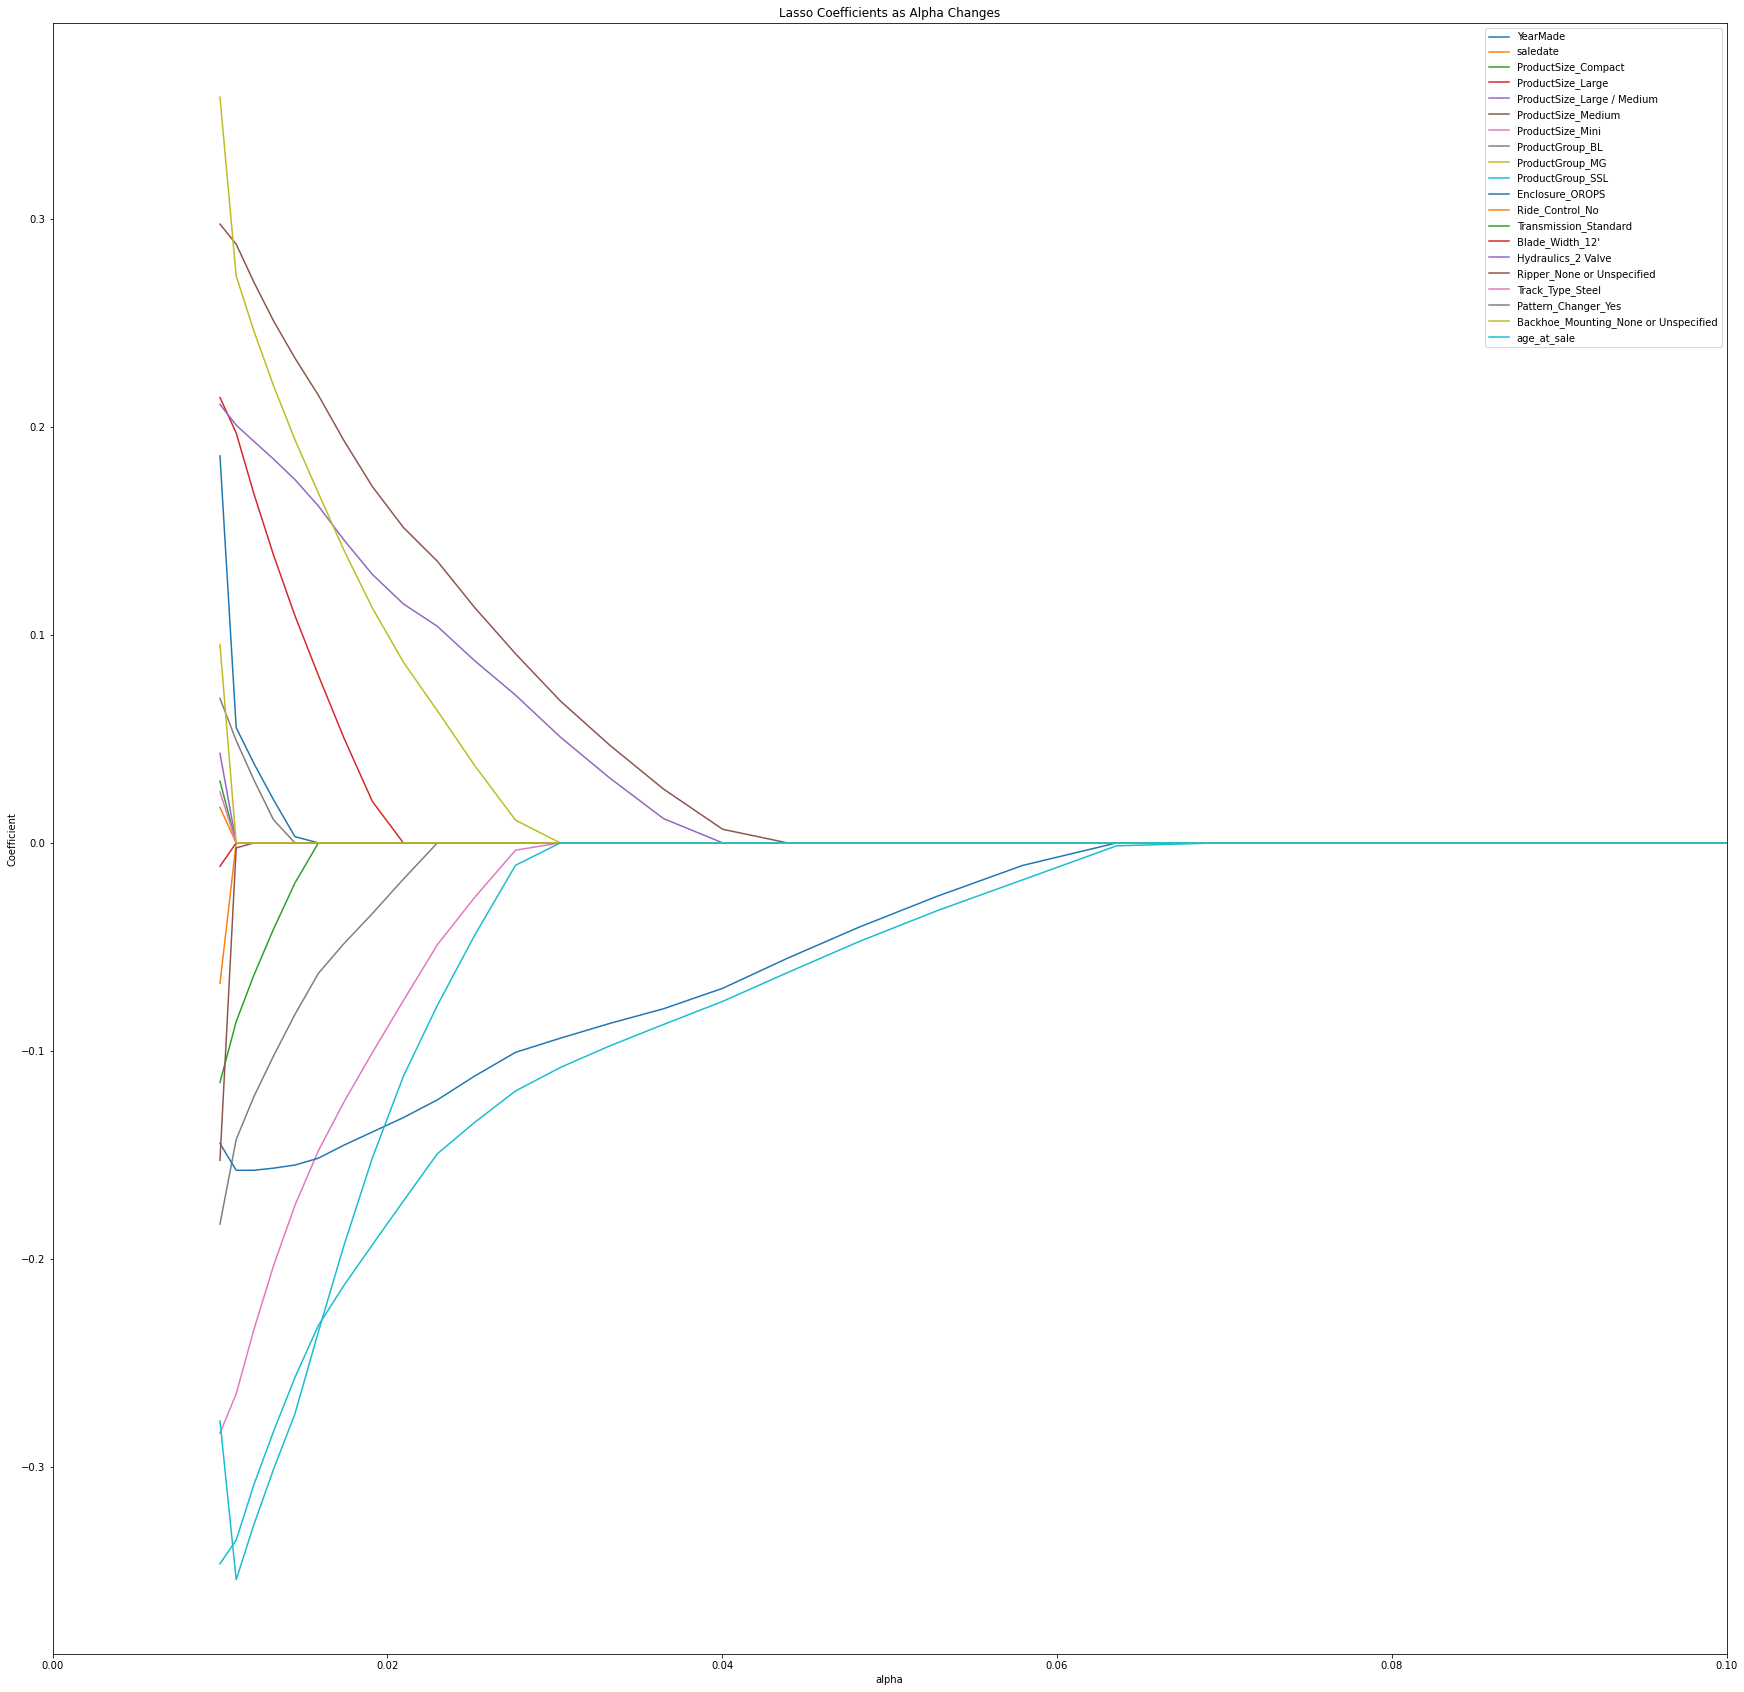

In [139]:
features = X.columns
df_coefs = pd.DataFrame(np.empty(shape=(len(ridge_alphas), X.shape[1])), columns = features, index = ridge_alphas)

standardizer = XyScaler()
X_train = np.array(X_train)
y_train = np.array(y_train)
standardizer.fit(X_train, y_train)
X_cv_train_std, y_cv_train_std = standardizer.transform(X_train, y_train)

#Re-run and get coefs
for idx, alpha in enumerate(lasso_alphas):
    model = Lasso(alpha = alpha)        
    model.fit(X_cv_train_std, y_cv_train_std)
    df_coefs.iloc[idx] = model.coef_

#Plot
fig, ax = plt.subplots(figsize = (30,30))
for col in df_coefs.columns:
    ax.plot(df_coefs.index, df_coefs[col], label = str(col))
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficient')
# ax.axhline(0, color = 'k')
ax.set_title('Lasso Coefficients as Alpha Changes')
ax.set_xlim(lasso_optimal_alpha, .1)
# ax.axvline(lasso_optimal_alpha, linestyle = 'dashed')
ax.legend();
plt.savefig('../presentation/lasso_lambda.png')

In [111]:
lasso_optimal_alpha


1e-12

In [125]:
model2 = Lasso(.00000000001, max_iter = 100000).fit(X_train,y_train)
yhat = model2.predict(X_test)

/home/noahprowell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435351241219.0898, tolerance: 3224861691.994398
  model = cd_fast.enet_coordinate_descent(


In [126]:
mean_lasso_error = np.sqrt(mean_squared_error(y_test, yhat))
mean_lasso_error

14050.068743393109

In [42]:
df_sorted = df_coefs.sort_index(ascending = True)

In [55]:
df_sorted

,YearMade,MachineHoursCurrentMeter,saledate,UsageBand_High,UsageBand_Low,UsageBand_Medium,datasource_121,datasource_132,datasource_136,datasource_149,...,Travel_Controls_Pedal,Differential_Type_Limited Slip,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_Wheel,age_at_sale
1.000000e-02,1.715543e-01,-1.831803e-02,-8.285653e-02,-7.222966e-03,1.361325e-02,-3.320310e-03,-2.128215e-02,-1.323570e-03,1.780272e-02,3.100221e-02,...,-2.088465e-03,-6.739357e-03,0.000000e+00,2.208034e-03,3.848840e-03,1.983237e-02,6.830433e-02,-3.416657e-03,4.706010e-03,-2.657968e-01
1.096884e-02,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,1.151780e-02,1.533904e-02,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.536399e-02,1.628065e-03,0.000000e+00,-0.000000e+00,0.000000e+00,-3.672046e-01
1.203154e-02,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-3.210817e-01
1.319720e-02,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-2.756217e-01
1.447580e-02,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-2.287779e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.908081e+07,6.472260e-322,8.300303e-322,9.980126e-322,9.980126e-322,6.966326e-322,5.237096e-322,5.632348e-322,8.300303e-322,1.185758e-321,1.274689e-321,...,1.674883e-321,1.343859e-321,1.744052e-321,1.936737e-321,1.897212e-321,1.966381e-321,2.267761e-321,2.005907e-321,2.119542e-321,2.030610e-321
7.577363e+07,2.490091e-321,2.030610e-321,2.307287e-321,2.307287e-321,2.549379e-321,5.632348e-322,9.189621e-322,8.300303e-322,3.557273e-322,1.744052e-321,...,1.072122e-321,7.509798e-322,8.893182e-322,9.733093e-322,8.300303e-322,9.980126e-322,1.274689e-321,9.189621e-322,7.509798e-322,1.185758e-321
8.311487e+07,9.189621e-322,6.966326e-322,1.072122e-321,6.472260e-322,1.274689e-321,1.141292e-321,9.189621e-322,1.165995e-321,6.225227e-322,1.141292e-321,...,1.847806e-321,1.442672e-321,2.149186e-321,1.709467e-321,2.005907e-321,2.154126e-321,2.198592e-321,2.692658e-321,2.435744e-321,2.178829e-321
9.116736e+07,2.415981e-321,2.129423e-321,2.415981e-321,2.030610e-321,2.598785e-321,2.030610e-321,2.549379e-321,2.307287e-321,2.075076e-321,2.549379e-321,...,5.237096e-322,4.792437e-322,3.557273e-322,5.237096e-322,4.792437e-322,3.853712e-322,3.853712e-322,3.853712e-322,5.237096e-322,5.928788e-322
